In [ ]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Drive already mounted at /content/GoogleDrive; to attempt to forcibly remount, call drive.mount("/content/GoogleDrive", force_remount=True).


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss
from imutils import paths

import matplotlib.pyplot as plt
import splitfolders
import cv2
import random

In [ ]:
inputFolder = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/Brain Cancer'
outputFolder = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/dataset'

In [ ]:
splitfolders.ratio(inputFolder, outputFolder, seed = 44, ratio = (0.8, 0.0, 0.2))

Copying files: 15000 files [08:15, 30.30 files/s]


In [ ]:
imgPaths = list(paths.list_images(outputFolder))
print(imgPaths[0].split('/'))

random.shuffle(imgPaths)

classes = [] # classes = ['brain_tumor', 'brain_menin', 'brain_glioma']
for imgPath in imgPaths:
  className = imgPath.split('/')[-2]

  if className not in classes:
    classes.append(className)

#print(classes)

X_train = []
y_train = []

X_test = []
y_test = []

IMGSIZE = 128
img_names = []

for imgPath in imgPaths:
  trainOrTest = imgPath.split('/')[-3]
  className = imgPath.split('/')[-2]

  img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  if trainOrTest == 'train':
    X_train.append(img)
    y_train.append(classes.index(className))
    img_names.append(imgPath.split('/')[-1])

  elif trainOrTest == 'test':
    X_test.append(img)
    y_test.append(classes.index(className))

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

12000 12000
3000 3000


In [ ]:
df = pd.DataFrame({
    'File Name' : img_names,
    'Category' : y_train
})

# print(classes.index('brain_tumor'))
# print(classes.index('brain_glioma'))
# print(classes.index('brain_menin'))

print(classes)
df.head()

['brain_tumor', 'brain_menin', 'brain_glioma']


,File Name,Category
0,brain_menin_0466.jpg,1
1,brain_menin_2933.jpg,1
2,brain_glioma_3210.jpg,2
3,brain_glioma_2218.jpg,2
4,brain_glioma_4257.jpg,2


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMGSIZE, IMGSIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)
# val_loss, val_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/15
375/375 [==============================] - 584s 2s/step - loss: 0.7432 - accuracy: 0.6879 - val_loss: 0.6903 - val_accuracy: 0.6817
Epoch 2/15
375/375 [==============================] - 593s 2s/step - loss: 0.4689 - accuracy: 0.8142 - val_loss: 0.6275 - val_accuracy: 0.7427
Epoch 3/15
375/375 [==============================] - 599s 2s/step - loss: 0.3447 - accuracy: 0.8631 - val_loss: 0.2723 - val_accuracy: 0.8957
Epoch 4/15
375/375 [==============================] - 600s 2s/step - loss: 0.2735 - accuracy: 0.8990 - val_loss: 0.3266 - val_accuracy: 0.8653
Epoch 5/15
375/375 [==============================] - 591s 2s/step - loss: 0.2251 - accuracy: 0.9153 - val_loss: 0.2367 - val_accuracy: 0.9160
Epoch 6/15
375/375 [==============================] - 594s 2s/step - loss: 0.1915 - accuracy: 0.9310 - val_loss: 0.3613 - val_accuracy: 0.8940
Epoch 7/15
375/375 [==============================] - 594s 2s/step - loss: 0.1517 - accuracy: 0.9427 - val_loss: 0.2245 - val_accuracy: 0.9213

In [ ]:
model.save('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/model3.h5')
# new_model = model.load_weights('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/model.h5')

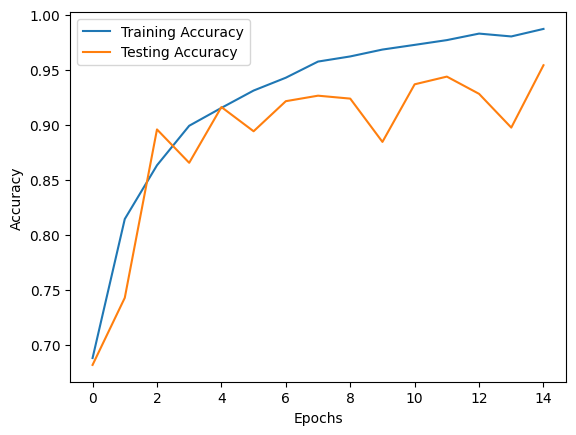

In [ ]:
# epochs = range(1,15)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

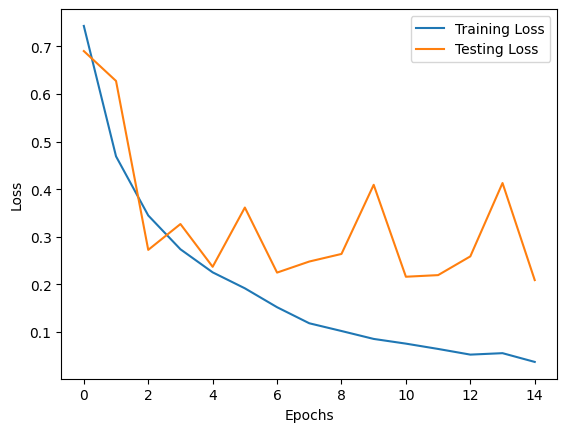

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(classes)
print(y_test[:25], '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(3000): #len(y_pred)
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol)

['brain_tumor', 'brain_menin', 'brain_glioma']
[0 0 2 0 0 1 2 0 0 0 0 2 2 0 0 2 2 0 2 1 2 2 0 0 0] 

[[9.9992400e-01 7.5901422e-05 2.9794058e-09]
 [9.9999684e-01 3.0507995e-06 9.0490039e-11]
 [6.9533474e-13 6.2490763e-11 9.9999994e-01]
 [9.9999994e-01 7.4280668e-12 2.8352125e-17]
 [9.9999994e-01 5.3939068e-08 4.1361425e-11]
 [1.5169085e-04 9.9521255e-01 4.6356926e-03]
 [6.3160705e-08 3.7380460e-08 9.9999982e-01]
 [9.4262594e-01 5.7244722e-02 1.2920726e-04]
 [9.9991912e-01 8.0592858e-05 2.0055425e-07]
 [9.9999994e-01 2.4570270e-12 6.1827067e-19]
 [9.9999994e-01 1.7949433e-09 4.2337236e-13]
 [3.7844119e-15 7.6265730e-12 9.9999994e-01]
 [2.3165061e-17 5.2599343e-14 9.9999994e-01]
 [9.9999994e-01 8.5868685e-15 1.2439935e-22]
 [9.9973774e-01 2.6231236e-04 5.1519994e-10]
 [5.7318434e-04 2.1256880e-01 7.8685790e-01]
 [1.8529448e-21 3.8842917e-16 9.9999994e-01]
 [9.9999207e-01 7.8664234e-06 8.1447444e-09]
 [8.0888890e-24 1.9546778e-18 9.9999994e-01]
 [9.0069038e-13 9.9999994e-01 4.6872189e-12]

<Figure size 500x500 with 0 Axes>

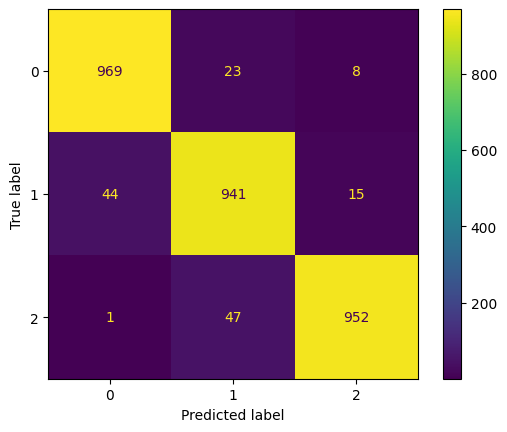

In [ ]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
test_img_path = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/dataset/test/brain_menin/brain_menin_0089.jpg'

test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (128,128))

plt.imshow(test_img)
plt.title(test_img_path.split('\\')[-1])

test_img = test_img[tf.newaxis, ...]

print(model.predict(test_img))
print(classes)